### Полезные ссылки для изучения Python
* Питон с нуля: http://nbviewer.jupyter.org/gist/rpmuller/5920182
* Можно попробовать Jupyter без установки: https://try.jupyter.org/; https://tmpnb.org/.
* Коллекция оутбуков: https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks
* Туториалы по машинному обучению: https://github.com/ujjwalkarn/Machine-Learning-Tutorials

## Кредитный Скоринг

#### Описание задачи
Дана выборка заявок на кредитный продукт. Про заявителей известны различные данные на момент заполнения анкеты. По части выборки (train, validate) известны результаты пользования кредитом (случился дефолт или нет), а по другой части(test) результаты известны только организаторам. Необходимо извлечь зависимость из имеющихся данных о заявителях и фактом наличия дефолта, и предсказать результат на тестовых данных.
В качестве ментрики используется [AUC](https://www.kaggle.com/wiki/AreaUnderCurve).
#### Описаие выборки  

##### APPLICATION_INFO.csv  
 - **id** - идентификатор счета
 - **application_dt** -  Дата подачи заявки
 - **sample_cd** -  Категория выборки
 - **education_cd** -  Образование
 - **gender_cd** -  Пол
 - **age** -  Возраст
 - **car_own_flg** -  Флаг наличия автомобиля
 - **car_type_flg** -  Флаг наличия иномарки
 - **appl_rej_cnt** -  Количество отказанных прошлых заявок
 - **good_work_flg** -  Флаг наличия "хорошей" работы
 - **Score_bki** -  Скор балл по данным из бюро кредитных историй
 - **out_request_cnt** -  Количество запросов в бюро
 - **region_rating** -  Рейтиг региона
 - **home_address_cd** -  Категаризатор домашнего адреса
 - **work_address_cd** -  Категаризатор рабочего адреса
 - **income** -  Доход заявителя
 - **SNA** -  Связь заявителя с клиентами
 - **first_time_cd** -  Давность наличия информации о заявителе
 - **Air_flg** -  Наличие загран паспорта
 
##### DEFAULT_FLG.csv  

 - **id** - идентификатор счета
 - **default_flg** -  Флаг дефота по кредиту



In [2]:
#Подключаем библиотеки
import pandas as pd #Обработка табличных данных
import numpy as np #Алгоритмы линейной алгебры
import matplotlib.pyplot as plt #Различные способы визуализации
%matplotlib inline

#### Предобработка данных

In [3]:
#Считываем данные из csv файла
df = pd.read_csv('application_info.csv', index_col='id')

IOError: File application_info.csv does not exist

In [ ]:
#Тип данных
type(df)

In [ ]:
#Размерность данных
df.shape

In [4]:
#Выведем первые несколько строк
df.head(5)

NameError: name 'df' is not defined

In [5]:
#Выведем несколько последних строк
df.tail(2)

NameError: name 'df' is not defined

In [6]:
#Список всех полей
df.columns

NameError: name 'df' is not defined

In [7]:
#Выведем типы полей
df.dtypes

NameError: name 'df' is not defined

In [8]:
#К элемнтам таблицы можно обращаться следующим способом
print(df['education_cd'][2])
print(df.education_cd[2])
print(df.at[2,'education_cd'])

NameError: name 'df' is not defined

In [10]:
#Выведем сводную информацию по числовым призакам
df.describe()

,age,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd
count,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000
mean,39.354566,0.277297,0.169701,-1.967120,2.015826,57.332340,1.602218,2.520210,42251.807610,1.725864,2.791657
std,11.451011,0.782794,0.375371,0.488055,2.138564,13.262627,0.520577,0.689453,45183.110679,1.115876,1.024393
min,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000
25%,30.000000,0.000000,0.000000,-2.313894,1.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000
50%,37.000000,0.000000,0.000000,-1.990599,2.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000
75%,48.000000,0.000000,0.000000,-1.641914,3.000000,70.000000,2.000000,3.000000,50000.000000,2.000000,4.000000
max,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000


In [11]:
#Выведем сводную информацию по строковым призакам
df.describe(include=['object'])

,application_dt,sample_cd,education_cd,gender_cd,car_own_flg,car_type_flg,Air_flg
count,205296,205296,204384,205296,205296,205296,205296
unique,333,3,5,2,2,2,2
top,18MAR2014,train,SCH,F,N,N,N
freq,1491,110148,100234,117400,139119,166471,172168


In [12]:
#application_date - дата. Изменим формат
df['application_dt'] = pd.to_datetime(df['application_dt'], format='%d%b%Y')

In [13]:
#Можно считать кол-во значений
df.sample_cd.value_counts()

train       110148
validate     70668
test         24480
Name: sample_cd, dtype: int64

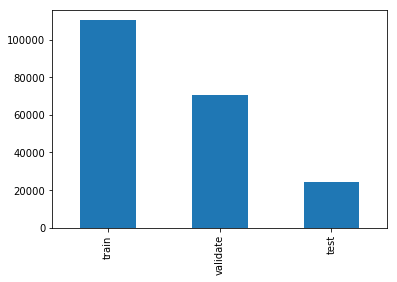

In [14]:
df.sample_cd.value_counts().plot(kind='bar');

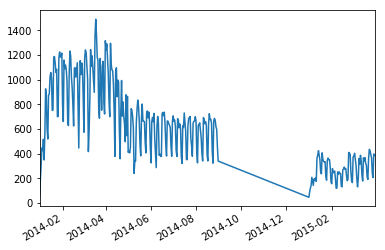

In [15]:
df.application_dt.value_counts().plot();

In [16]:
#Загрузим флаг дефолта
y = pd.read_csv('default_flg.csv', index_col='id')
print(y.shape)
y.head(2)

(180816, 1)


,default_flg
id,
1,0
2,0


In [17]:
#Запоминаем разбивку на обучение, валидацию и тест
train_index    = df[df.sample_cd =='train'].sample_cd.index
validate_index = df[df.sample_cd =='validate'].sample_cd.index
test_index     = df[df.sample_cd =='test'].sample_cd.index

#Удаляем два столбца из выборки
df.drop(['sample_cd','application_dt'],axis=1,inplace=True)
df.head(1)

,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg
id,,,,,,,,,,,,,,,,
1,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N


In [18]:
#Список категориальных полей
category_columns = [col for col in df.columns if df.dtypes[col] == 'object']
category_columns

['education_cd', 'gender_cd', 'car_own_flg', 'car_type_flg', 'Air_flg']

In [19]:
#Поля с пустыми значениями
df.isnull().any()
data = df[df.isnull()['education_cd'] == True]
print sum(i > 180817 for i in data.index.values)
print len(data.index.values)

189
912


In [20]:
df.education_cd.value_counts(dropna=False)

SCH    100234
GRD     71417
UGR     28284
PGR      3841
NaN       912
ACD       608
Name: education_cd, dtype: int64

In [21]:
#Заменим пустые значения на самое частое
df.education_cd.fillna('SCH', inplace=True)
df.head()

,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg
id,,,,,,,,,,,,,,,,
1,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N
2,GRD,F,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N
3,SCH,M,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N
4,GRD,F,35,N,N,0,1,-2.552133,2,20,2,3,80000,1,3,N
5,UGR,F,24,N,N,0,0,-1.914581,1,50,2,3,27000,1,2,N


In [22]:
#Производим dummy кодирование нечисловых полей
Data_category = pd.get_dummies(df[category_columns], drop_first=True)
Data_category.head(2)

,education_cd_GRD,education_cd_PGR,education_cd_SCH,education_cd_UGR,gender_cd_M,car_own_flg_Y,car_type_flg_Y,Air_flg_Y
id,,,,,,,,
1,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Заменяем нечисловые поля на dummy кодированные
df.drop(category_columns, axis=1, inplace=True)
df = pd.concat([df, Data_category], axis=1)
del Data_category 
df.head(2)

,age,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,education_cd_GRD,education_cd_PGR,education_cd_SCH,education_cd_UGR,gender_cd_M,car_own_flg_Y,car_type_flg_Y,Air_flg_Y
id,,,,,,,,,,,,,,,,,,,
1,27,0,0,-1.917831,0,40,2,3,32000,1,4,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
2,26,0,0,-1.153144,2,60,2,3,50000,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Проверяем типы полей
df.dtypes
data = df.loc[train_index]
for col in data.columns:
    print  col, data[col].corr(y.loc[train_index].default_flg)

age -0.026563097165
appl_rej_cnt 0.111384294111
good_work_flg -0.0471530378722
Score_bki 0.175155154175
out_request_cnt 0.0800219135665
region_rating -0.0918536440866
home_address_cd 0.0841237879181
work_address_cd 0.0823685804201
income -0.0385482105853
SNA 0.125247521422
first_time_cd -0.104764481224
education_cd_GRD -0.0775958094469
education_cd_PGR -0.0246254891081
education_cd_SCH 0.0771333380324
education_cd_UGR 0.00403231716368
gender_cd_M 0.020414587528
car_own_flg_Y -0.0414550352044
car_type_flg_Y -0.0553045819644
Air_flg_Y -0.0643071772249


### PCA

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sScaler = StandardScaler(copy=True, with_mean=True, with_std=True)
trainScaled = sScaler.fit_transform(df.loc[train_index])
testScaled = sScaler.transform(df.loc[test_index])
validateScaled = sScaler.transform(df.loc[validate_index])
#forPca = pd.DataFrame(xScaled)

#from sklearn.decomposition import PCA

#pcaMod = PCA(n_components=2)
#xPca = pcaMod.fit_transform(df)
#xPcaDataframe = pd.DataFrame(xPca, columns=['PC1', 'PC2'])
#xPcaDataframe['cat'] = y.loc[train_index].default_flg

### LDA

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import minmax_scale

In [28]:
#xScaled = minmax_scale(df.loc[train_index], feature_range=(0, 1))
#ldaMod = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto', priors=None, n_components=2,
 #                                   store_covariance=False, tol=0.0001)

In [29]:
#fittedLdaMod = ldaMod.fit(xScaled, y.loc[train_index].default_flg).transform(xScaled)
#ldaDf = pd.DataFrame(fittedLdaMod, columns=['one', 'two'])
#ldaDf['cat'] = y.loc[train_index].default_flg

In [30]:
# Создаем новое поле
#df['income_40k_flg'] = df.income.apply(lambda x: int(x > 40000))
#df.drop('income', axis=1, inplace=True)

#### Логистическая регрессия

In [31]:
#Импортируем логистическую регрессию
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [32]:
#Выбираем параметр регуляризаци на валидационной выборке
print ('%8s %8s %4s' % ('Train','Validate','C'))
for C in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:
#for C in np.arange(1, 30, 1):
    LR = LogisticRegression(C=C,penalty='l2')
    LR.fit(trainScaled, y.loc[train_index].default_flg)
    AUC_train = roc_auc_score(y.loc[train_index].default_flg, LR.predict_proba(trainScaled)[:,1])
    AUC_validate = roc_auc_score(y.loc[validate_index].default_flg, LR.predict_proba(validateScaled)[:,1])
    print('%.6f %.6f %8f' %  (AUC_train,AUC_validate,C))

   Train Validate    C
0.722136 0.710095 0.000010
0.728343 0.715990 0.000100
0.729252 0.716437 0.001000
0.729058 0.716113 0.010000
0.729038 0.716109 0.100000
0.729031 0.716115 1.000000
0.729029 0.716115 10.000000
0.729029 0.716115 100.000000
0.729029 0.716115 1000.000000


In [33]:
#Запускаем лучшее решение и сохраняем результат
LR_best = LogisticRegression(C=0.001, penalty='l2')
LR.fit(trainScaled, y.loc[train_index].default_flg)
test_l = LR.predict_proba(testScaled)[:,1]

In [34]:
#Выводим коэффициенты
pd.DataFrame(LR.coef_.reshape(LR.coef_.shape[1],1), index=df.columns, columns=['coef'])

,coef
age,-0.064482
appl_rej_cnt,0.105972
good_work_flg,-0.091941
Score_bki,0.487701
out_request_cnt,0.149578
region_rating,-0.333882
home_address_cd,0.148079
work_address_cd,0.195633
income,-0.007382
SNA,0.163793


In [35]:
#Сохраняем результат в csv
test_pd = pd.DataFrame(test_l,columns=['score'], index=test_index)
test_pd.to_csv('test_pd.csv')
print(test_pd.shape)
test_pd.head(2)

(24480, 1)


,score
id,
180817,0.074896
180818,0.119882


#### Gaussian Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [37]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [38]:
gnb.fit(trainScaled, y.loc[train_index].default_flg)
#mnb.fit(df.loc[train_index], y.loc[train_index].default_flg)
bnb.fit(trainScaled, y.loc[train_index].default_flg)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [39]:
AUC_train = roc_auc_score(y.loc[train_index].default_flg, gnb.predict_proba(trainScaled)[:,1])
AUC_validate = roc_auc_score(y.loc[validate_index].default_flg, gnb.predict_proba(validateScaled)[:,1])
print('%.6f %.6f' %  (AUC_train, AUC_validate))

0.691929 0.682650


In [40]:
gnb_l = gnb.predict_proba(testScaled)[:,1]

#### CART-Adaboost

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
for n in [0.1]:
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7), algorithm='SAMME',
                             n_estimators=130, learning_rate = n)
    bdt.fit(trainScaled, y.loc[train_index].default_flg)
    AUC_train = roc_auc_score(y.loc[train_index].default_flg, bdt.predict_proba(trainScaled)[:,1])
    AUC_validate = roc_auc_score(y.loc[validate_index].default_flg, bdt.predict_proba(validateScaled)[:,1])
    print('%.6f %.6f %f' %  (AUC_train, AUC_validate, n))

0.753537 0.705075 0.100000


In [43]:
#Запускаем лучшее решение и сохраняем результат
best_bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7), algorithm='SAMME',
                              n_estimators=130, learning_rate = 0.1)
best_bdt.fit(trainScaled, y.loc[train_index].default_flg)
bdt_l = best_bdt.predict_proba(testScaled)[:,1]

#### Random Forest

In [44]:
 from sklearn.ensemble import RandomForestClassifier

In [45]:
for n in [100]:
    rfc = RandomForestClassifier(n_estimators=2000, max_depth = 20, n_jobs = 4)
    rfc.fit(trainScaled, y.loc[train_index].default_flg)
    AUC_train = roc_auc_score(y.loc[train_index].default_flg, rfc.predict_proba(trainScaled)[:,1])
    AUC_validate = roc_auc_score(y.loc[validate_index].default_flg, rfc.predict_proba(validateScaled)[:,1])
    print('%.6f %.6f %f' %  (AUC_train, AUC_validate, n))

0.998406 0.706271 100.000000


In [46]:
#Запускаем лучшее решение и сохраняем результат
rfc_best = RandomForestClassifier(n_estimators=100, max_depth = 10, n_jobs = 4)
rfc_best.fit(trainScaled, y.loc[train_index].default_flg)
rfc_l = rfc_best.predict_proba(testScaled)[:,1]

#### XGBoost

In [1]:
import xgboost as xgb

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
bst = xgb.XGBClassifier()

In [3]:
bst.fit()

TypeError: fit() takes at least 3 arguments (1 given)

In [48]:
dtrain = xgb.DMatrix(trainScaled, y.loc[train_index].values)
xgtrain = xgb.DMatrix(trainScaled)
dvalidate = xgb.DMatrix(validateScaled)

In [2]:

for s in np.arange(0.1, 0.2, 0.1):
    for g in ['auto']:
        param = {'max_depth':3, 'tree_method':g, 'min_child_weight':2.4, 'subsample':0.7,
                 'colsample_bytree':0.7, 'eta':0.3, 'silent':1, 'objective':'binary:logistic' }
        num_round = 60
        bst = xgb.train(param, dtrain, num_round)
        AUC_train = roc_auc_score(y.loc[train_index].default_flg, bst.predict(xgtrain))
        AUC_validate = roc_auc_score(y.loc[validate_index].default_flg, bst.predict(dvalidate))
        print('%.6f %.6f subsample = %f tree_method = %s' %  (AUC_train, AUC_validate, s, g))

NameError: name 'np' is not defined

In [56]:
#Запускаем лучшее решение и сохраняем результат
param = {'max_depth':3, 'min_child_weight':2.4, 'subsample':0.7, 'colsample_bytree':0.7,
         'eta':0.3, 'silent':1, 'objective':'binary:logistic' }
num_round = 60
xgb_best = xgb.train(param, dtrain, num_round)
xgb_l = bst.predict(xgb.DMatrix(testScaled))

In [51]:
#Сохраняем результат в csv
test_pd = pd.DataFrame(test_pd,columns=['score'], index=test_index)
test_pd.to_csv('xgb.csv')
print(test_pd.shape)
test_pd.head(2)

(24480, 1)


,score
id,
180817,0.074896
180818,0.119882


In [52]:
#prob_list = np.vstack((test_l, gnb_l, bdt_l, rfc_l, xgb_l)).T
prob_list = np.vstack((test_l, gnb_l, rfc_l, xgb_l)).T
#prob_list = np.transpose(prob_list)
prob_pd = pd.DataFrame(prob_list, columns=['score Log', 'GNB', 'RFC', 'XGB'], index=test_index)
#prob_pd = pd.DataFrame(prob_list, columns=['score Log', 'GNB', 'BDT', 'RFC', 'XGB'], index=test_index)

In [53]:
prob_pd['Score'] = prob_pd.mean(numeric_only=True, axis=1)
prob_pd

,score Log,GNB,RFC,XGB,Score
id,,,,,
180817,0.074896,1.673303e-01,0.105116,0.104059,0.112850
180818,0.119882,2.688187e-09,0.190782,0.124710,0.108844
180819,0.058424,4.001438e-02,0.078732,0.061664,0.059709
180820,0.115196,4.409736e-01,0.126687,0.103591,0.196612
180821,0.037131,1.330781e-03,0.066232,0.040957,0.036413
180822,0.141562,4.066461e-01,0.145906,0.102102,0.199054
180823,0.064439,8.928004e-02,0.058494,0.053750,0.066491
180824,0.018719,8.278293e-05,0.027919,0.018261,0.016246
180825,0.050541,7.180928e-03,0.068415,0.056167,0.045576


In [54]:
prob_pd['Score'] = prob_pd.mean(numeric_only=True, axis=1)
ans = pd.DataFrame(prob_pd['Score'])
ans.to_csv('ans.csv')

## Voting

In [55]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('lr', LR_best), ('gnb', gnb), ('bdt', best_bdt),
                                    ('rfc', rfc_best)], voting='soft', weights=[2,1,2,2])

#eclf.fit(trainScaled, y.loc[train_index].default_flg)
#AUC_train = roc_auc_score(y.loc[train_index].default_flg, eclf.predict_proba(trainScaled)[:,1])
#AUC_validate = roc_auc_score(y.loc[validate_index].default_flg, eclf.predict_proba(validateScaled)[:,1])
#print('%.6f %.6f' %  (AUC_train, AUC_validate))